<a href="https://colab.research.google.com/github/sbb2002/Portfolio/blob/main/.study/Tensorflow/ML_ch12_1_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ch 12. RNN (Recurrent Neural Network)

Data 중에서 음성인식 데이터나 자연어 같은 거에서는 sequence data로 이루어져 있다. 마치 이것은 사람 말은 단어 한 마디듣고 다 알 수 없고, 전에 했던 말과 종합해서 끝까지 들어야 맥락을 파악할 수 있는 것과 같다. (time-series) \
이런 작업은 NN / CNN은 할 수 없다.



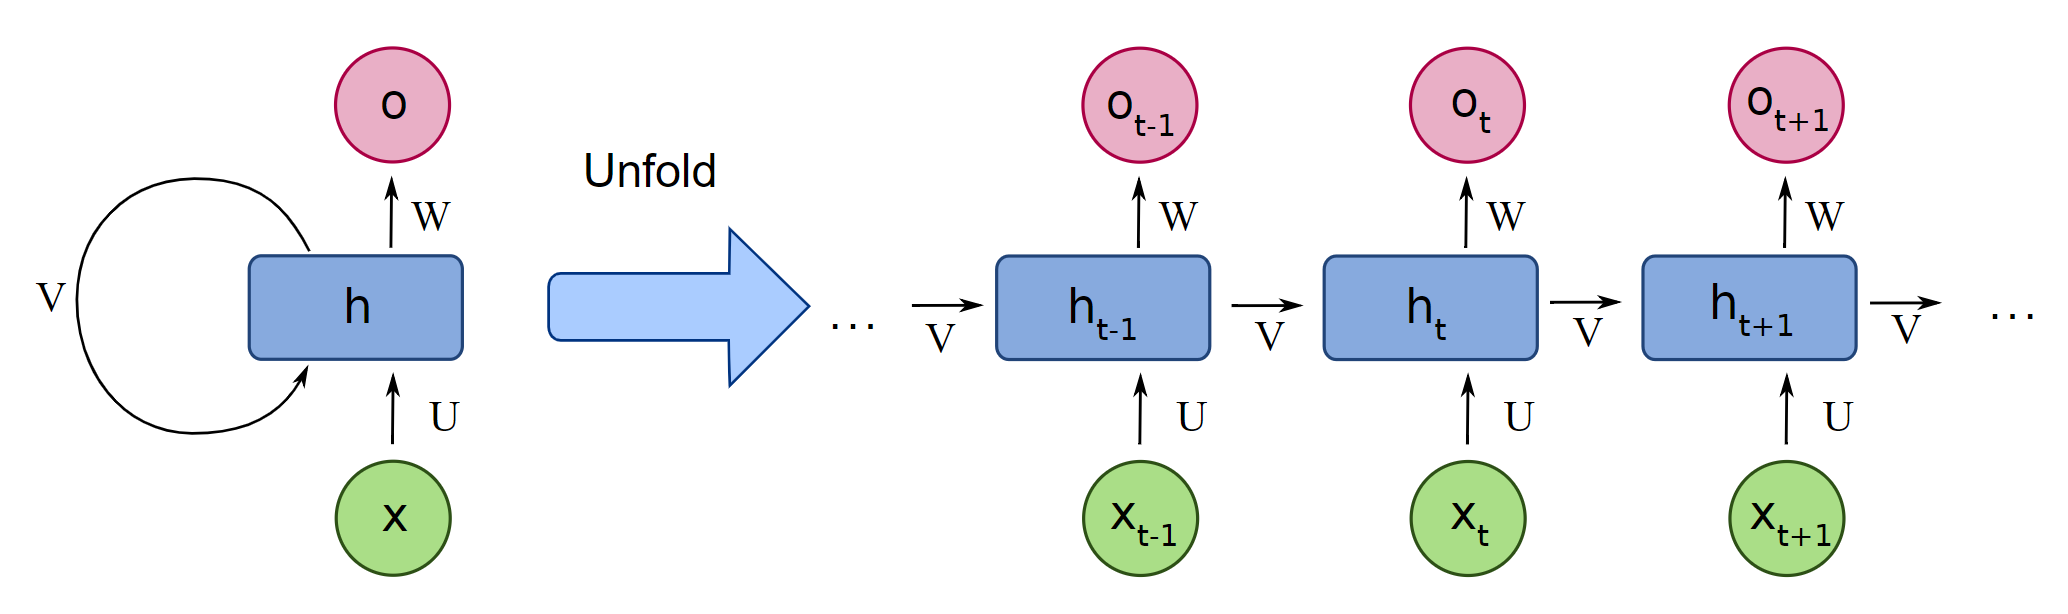

Recurrent(되풀이되는) Neural Network는 이 그림과 같다. 한번의 연산이 끝나면 출력만 하는 것이 아니라, 그것이 자기자신에게도 영향을 미친다. 다시 연산을 하게 되면 기존의 출력값과 다르게 출력된다.

RNN에서는 state(; time step) $t$라는 개념이 있다. 기존의 step과 혼동하지 않도록 조심하자. \
hypo.는 자신의 출력값을 다음 state에게 전달해준다. 새로운 state의 hypo.는 그것을 입력받아 연산하고 다시 다음 state로 전달해준다. 이것을 수식으로 나타내면 이리 생겼다.

$$ h_{t} = f_{W}(h_{t-1},x_{t}) $$
> $ \begin{align*} ;
 h_{t} & =\text{(new state of hypo.)} \\
f_{W} & =\text{(some func. w/ params W, is also same every state.)} \\
h_{t-1} & =\text{(old state of hypo.)} \\
x_{t} & =\text{(input vector at some time step)}
\end{align*} $

(Vanilla) Recurrent Neural Network에서의 $f_{W}$는 아래의 함수를 사용한다.

> Hidden layer $ h_{t} = tanh(W_{hh} h_{t-1} + W_{xh} x_{t}) $ \
Output layer $ y_{t} = W_{hy} h_{t} $

RNN application:
* Language modeling
* Speech recognition
* Machine tranlation
* Conversation modeling / Question Answering
* Image/Video captioning
* Image/music/dance generation

# Teach RNN 'hi hello'

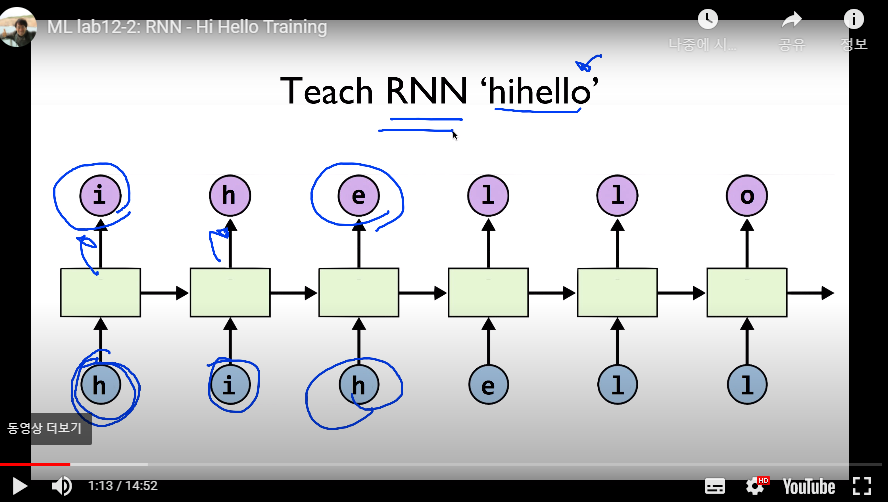

이 모델은 input이 들어오면 다음 input이 무엇일지 예측하는 모델이다. 

잘 보면 input 'h'가 들어간게 두개 보일 것이다. 그런데 하나는 다음으로 나올 글자가 'i'라고 하고 또 다른 하나는 'e'라고 예측했다. 이처럼 NN 이나 CNN은 이런 상황에서 일관적인 답만 내놓을 수만 있다. RNN은 앞서 예측한 결과물에 따라 이번 예측값이 전과 다르게 나올 수 있다.

이 작업을 수행하기 위해서는 input text에 대한 one-hot encoding을 해야한다.
* text: 'hihello'
* unique chars(vocabulary, 쓰인 글자): h i e l o
* voc index(dict): {h: 0, i: 1, e: 2, l: 3, o: 4}
 ```
 > [1,0,0,0,0]  # h 0 
 > [0,1,0,0,0]  # i 1 
 > [0,0,1,0,0]  # e 2 
 > [0,0,0,1,0]  # l 3 
 > [0,0,0,0,1]  # o 4 
  ```

그럼 input과 hidden, output의 shape를 보자.
여기서 shape=(batch_size, sequence_length, input(output)_dimension) 의 의미를 가진다.
```
input_shape=(1, 6, 5)
hidden(output)_shape=(1, 6 ,5)
```
> batch_size = 문자열 = 1 \
> sequence 수(len(text)-1) = 6 \
> input(ouput)_dim = unique chars = 5

---

## Practice: RNN w/ TF 2.0

참 안타까운 일이다. '모두의 딥러닝' 강좌에서의 RNN은 TF 버전 문제로 실습하기 어려워졌다. tf.contrib가 드래곤볼마냥 여기저기 흩어지고 seq2seq같은건 아예 사라져버렸기 때문이다... 내가 low-lv api를 다룰 수 있으면 좋겠지만, 지금은 RNN을 배우는게 더 우선이라 생각한다. 그래서 youtube에서 TF 2.0을 기준으로 하는 RNN 실습으로 대체하겠다. 링크를 남겨둔다. \
https://www.youtube.com/watch?v=BSpXCRTOLJA

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Take a look x_train
print(x_train.shape)
print(x_train[0].shape)

x_train = x_train/255.0
x_test = x_test/255.0

(60000, 28, 28)
(28, 28)


In [ ]:
model = Sequential()

model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)

# mean_squared_error = mse
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15, validation_batch_size=(x_test, y_test))




Epoch 1/15
1875/1875 [==============================] - 19s 6ms/step - loss: 0.4201 - accuracy: 0.8712
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1264 - accuracy: 0.9658
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0898 - accuracy: 0.9760
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0669 - accuracy: 0.9822
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0583 - accuracy: 0.9844
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0497 - accuracy: 0.9864
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0397 - accuracy: 0.9891
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363 - accuracy: 0.9906
Epoch 9/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0332 - accuracy: 0.9912
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - l

## Practice: TF 1.0

좋은 소식이다! TF를 다운그레이드해서 연습문제를 그대로 풀 수 있게 되었다!! 이제 해보자.

In [ ]:
tf.reset_default_graph()

In [ ]:
# 런타임 초기화되었을 시 사용(실행 후 런타임 다시시작 필요, 초기화 x)
!pip install tensorflow==1.14

In [ ]:
# 런타임 초기화되었을 시 사용
!pip install tensorflow-gpu==1.14

In [ ]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

In [ ]:
idx2char = ['h', 'i', 'e', 'l', 'o']

# Teach hello : hihell -> ihello
x_data = [[0,1,0,2,3,3]]  # hihell
x_one_hot = [[[1,0,0,0,0],    # h 0
              [0,1,0,0,0],    # i 1
              [1,0,0,0,0],    # h 0
              [0,0,1,0,0],    # e 2
              [0,0,0,1,0],    # l 3
              [0,0,0,1,0]]]   # l 3

y_data = [[1,0,2,3,3,4]]  # ihello

In [ ]:
# params
num_calsses = 5
input_dim = 5       # one-hot size
hidden_size = 5     # output from the LSTM, 5 to directly predict one-hot
batch_size = 1      # one sentence
sequence_length = 6 # ihello
learning_rate = 0.1

In [ ]:
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])    # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])                 # Y label

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32
)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(
    inputs=X_for_fc, num_outputs=num_classes, activation_fn=None
)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights
)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(50):
    l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
    result = sess.run(prediction, feed_dict={X: x_one_hot})
    print(i, "\tLoss: ", l, "\tPrediction: ", result, "\tTrue Y: ", y_data)

    # print char using dic
    result_str = [idx2char[c] for c in np.squeeze(result)]
    print("\tPrediction str: ", ''.join(result_str))

0 	Loss:  2.2777631 	Prediction:  [[2 2 2 2 4 4]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeeeoo
1 	Loss:  2.060548 	Prediction:  [[2 2 2 2 4 4]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeeeoo
2 	Loss:  1.8183513 	Prediction:  [[2 2 2 3 4 4]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeeloo
3 	Loss:  1.5645808 	Prediction:  [[2 2 2 3 3 4]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeello
4 	Loss:  1.3322349 	Prediction:  [[2 2 2 3 3 4]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeello
5 	Loss:  1.1388854 	Prediction:  [[2 2 2 3 3 3]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeelll
6 	Loss:  0.98800707 	Prediction:  [[2 2 2 3 3 3]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeelll
7 	Loss:  0.87264913 	Prediction:  [[2 2 2 3 3 3]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeelll
8 	Loss:  0.78284377 	Prediction:  [[2 0 2 3 3 3]] 	True Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ehelll
9 	Loss:  0.708632 	Prediction:  [[1 0 2 3 3

# Long sequence RNN

이번엔 긴 문장를 RNN으로 예측해보는 것이 목표다. 결과를 미리 알려주면 deep하지 않아서 썩 정확하지 않다고 한다.

In [ ]:
tf.reset_default_graph()

In [ ]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

In [ ]:
sample = "if you want you"
idx2char = list(set(sample))     # idx -> char, set은 순서상관x 중복x
char2idx = {c: i for i, c in enumerate(idx2char)}   # char -> idx

In [ ]:
print(idx2_char)
print(char2idx)

['n', 't', 'y', ' ', 'f', 'i', 'w', 'a', 'o', 'u']
{'n': 0, 't': 1, 'y': 2, ' ': 3, 'f': 4, 'i': 5, 'w': 6, 'a': 7, 'o': 8, 'u': 9}


In [ ]:
# hyper params (자동화를 하기 위함)
dic_size = len(char2idx)        # RNN input size (one-hot size)
hidden_size = len(char2idx)     # RNN output size
num_classes = len(char2idx)     # final output size (RNN or softmax, etc)
batch_size = 1                  # one sample data, one batch
sequence_length = len(sample)   # num of lstm rollings (unit #)
learning_rate = 0.1

In [ ]:
# Give data
sample_idx = [char2idx[c] for c in sample]
x_data = [sample_idx[:-1]]
y_data = [sample_idx[1:]]

KeyError: ignored